## Linear Regression Example

As usual, we load our libraries first. In addition to the libraries we have already used, we are going to be using `sklearn` to do the linear regression for us.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
%matplotlib notebook

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

The data for this example are height measurements (in inches) of mothers and their daughters. Get the csv file here:

[https://tomfletcher.github.io/FoDA/examples/mother_daughter.csv](https://tomfletcher.github.io/FoDA/examples/mother_daughter.csv)

This dataset is adapted from [https://github.com/kbroman/PearsonData](https://github.com/kbroman/PearsonData) and is from a classic 1903 paper:

Karl Pearson and Alice Lee (1903) On the laws of inheritance in man: I. Inheritance of physical characters. Biometrika 2: 357-462

So, we might ask: is there any relationship between the height of a mother and the height of her daughter? Could we predict how tall a woman is going to be if we know the height of her mother?

In [3]:
df = pd.read_csv("mother_daughter.csv")
df.head(n=10)

,mother_stature,daughter_stature
0,59.4,53.6
1,59.8,56.0
2,58.6,56.7
3,59.4,56.0
4,60.4,56.7
5,61.0,56.9
6,55.1,57.8
7,55.5,57.3
8,56.7,57.9
9,57.2,57.1


As always, we start off by plotting the data. We have two columns of real numbers, so a 2D scatterplot is appropriate.

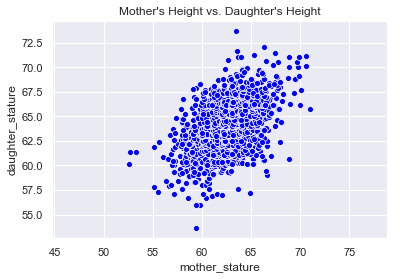

In [4]:
ax = sns.scatterplot(x = "mother_stature", y = "daughter_stature", color = "blue", data = df)
ax.axis("equal")
ax.set_title("Mother\'s Height vs. Daughter\'s Height")
plt.show()

Next, we run a linear regression using `sklearn` and take a look at the resulting slope and intercept.

In [5]:
lm = linear_model.LinearRegression()
lm.fit(df[["mother_stature"]], df["daughter_stature"])

# Get the intercept
a = lm.intercept_
# Get the slope
b = lm.coef_[0]

print("The intercept is",  a)
print("The slope is", b)

The intercept is 29.956439863481357
The slope is 0.5429158932344403


Finally, using the fitted slope and intercept, we plot the estimated regression line.

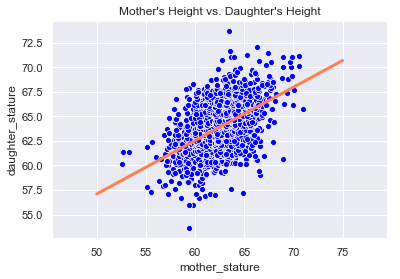

In [6]:
# Plot the data as a scatter plot again
ax = sns.scatterplot(x = "mother_stature", y = "daughter_stature", color = "blue", data = df)

# Plot the estimated line from x = 50 to 75
x = np.array([50, 75])
sns.lineplot(x, a + b * x, color = "coral", lw = 3)

ax.axis("equal")
ax.set_title("Mother\'s Height vs. Daughter\'s Height")
plt.show()